In [3]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1234)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams["figure.figsize"] = [16, 9]

In [4]:
# arrange 2D matrices as tiles (takes 4D `examples` tensor with dims: rows x cols x tile_height x tile_width)
def tiles(examples):
    rows_count = examples.shape[0]
    cols_count = examples.shape[1]
    tile_height = examples.shape[2]
    tile_width = examples.shape[3]
    
    space_between_tiles = 2
    
    height = rows_count * (tile_height + space_between_tiles)
    width = cols_count * (tile_width + space_between_tiles)
    
    img_matrix = np.empty(shape=(height, width))
    img_matrix.fill(np.nan)
    
    for row in range(rows_count):
        for col in range(cols_count):
            row_ind = (tile_height + space_between_tiles) * row
            col_ind = (tile_width + space_between_tiles) * col
            img_matrix[row_ind:row_ind + tile_height, col_ind:col_ind + tile_width] = examples[row, col]
    
    return img_matrix

## MNIST Dataset

In [5]:
from six.moves import urllib    
opener = urllib.request.build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0')]
urllib.request.install_opener(opener)

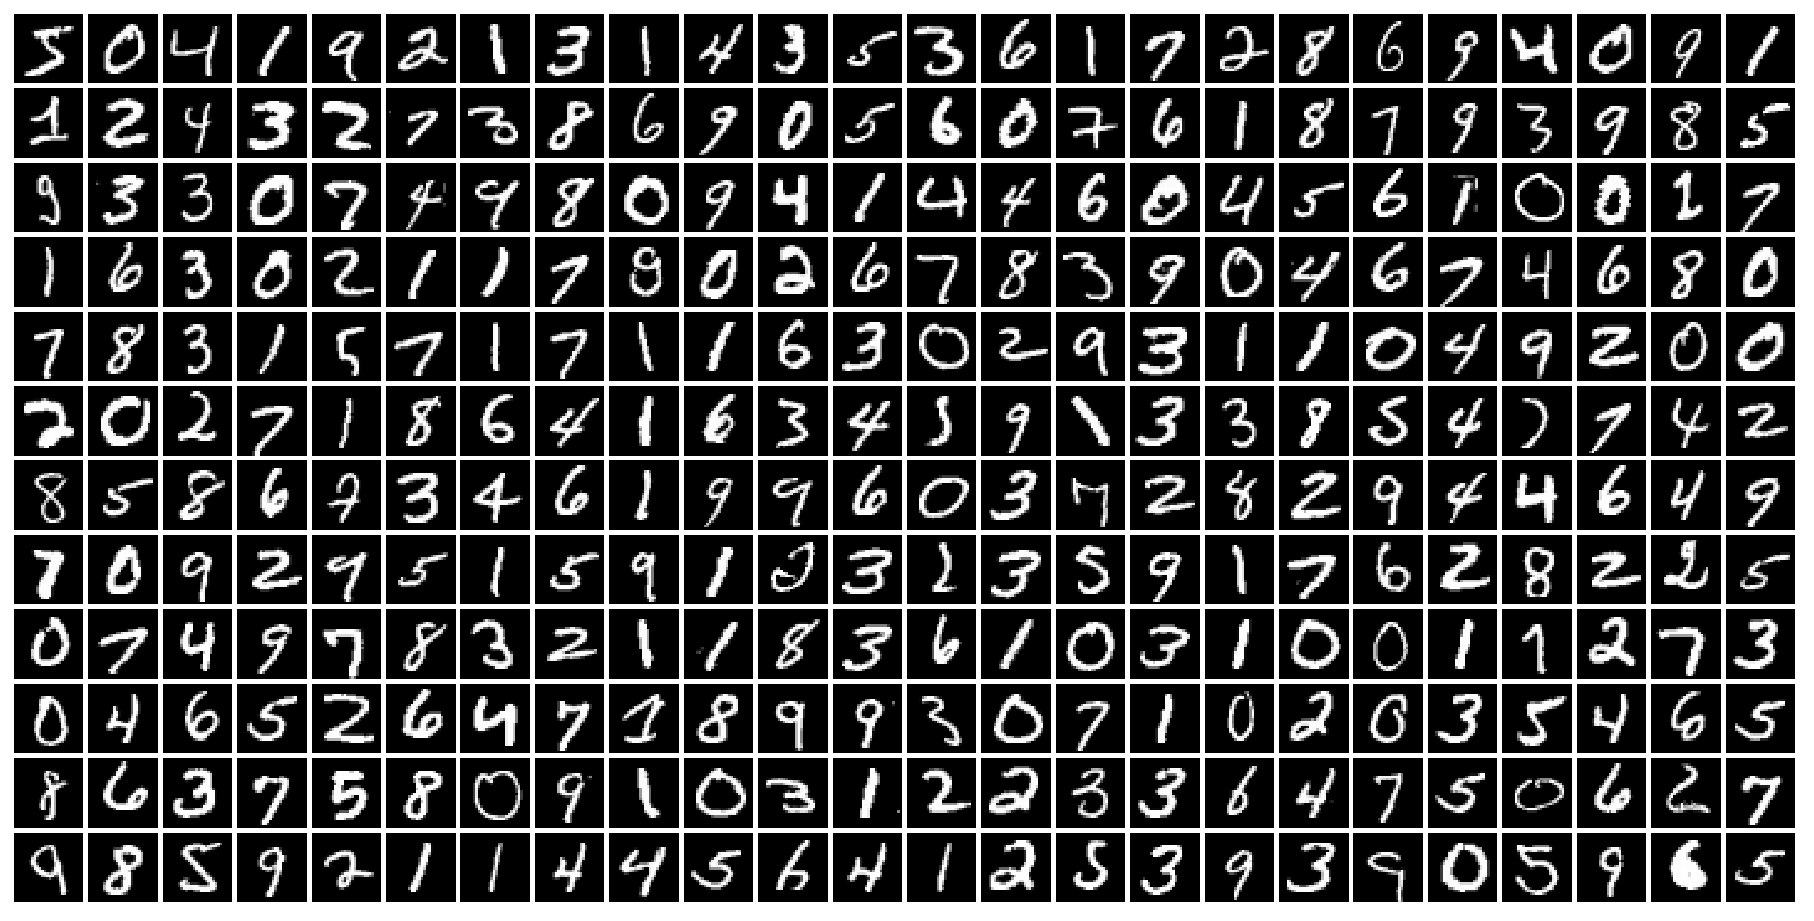

In [6]:
import mnist
digits = np.reshape(mnist.train_images()[:12*24], newshape=(12, 24, 28, 28))
img = tiles(digits)

plt.matshow(img, cmap='gray', interpolation='none')
plt.axis('off')
plt.show()

In [7]:
X = mnist.train_images().astype(np.float32) / 255.0
y = mnist.train_labels()
X.shape

(60000, 28, 28)

Reshape `X` so that the last two dimensions are collapsed into single dimension.

In [8]:
X = X.reshape(X.shape[0], -1)

In [9]:
X.shape

(60000, 784)

## Visualizing the distribution of MNIST digits

Add a scatter plot to `plot`, which:
* displays the first two dimensions of `X`,
* includes only these elements from `X` for which `y == i` (i.e. elements from the i-th class),
* includes label (i.e. `i`) in the legend.


In [12]:
def plot_2d_mnist_scatter(X, y):
    fig, plot = plt.subplots()
    fig.set_size_inches(16, 16)
    plt.prism()

    for i in range(10):
        digit_indices = (y == i)
        dim0 = X[digit_indices, 0]
        dim1 = X[digit_indices, 1]
        plot.scatter(dim0, dim1, label=f"Digit {i}")
    
    plot.set_xticks(())
    plot.set_yticks(())

    plt.tight_layout()
    plt.legend()
    plt.show()

### Principal Component Analysis (PCA)

In [13]:
SAMPLES_LIMIT = 2000
X_small = X[:SAMPLES_LIMIT]
y_small = y[:SAMPLES_LIMIT]

Use PCA function to embed `X_small` in two dimensions. Store the result in `X_pca_embedded`.

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca_embedded = pca.fit_transform(X_small)

In [15]:
X_pca_embedded.shape

(2000, 2)

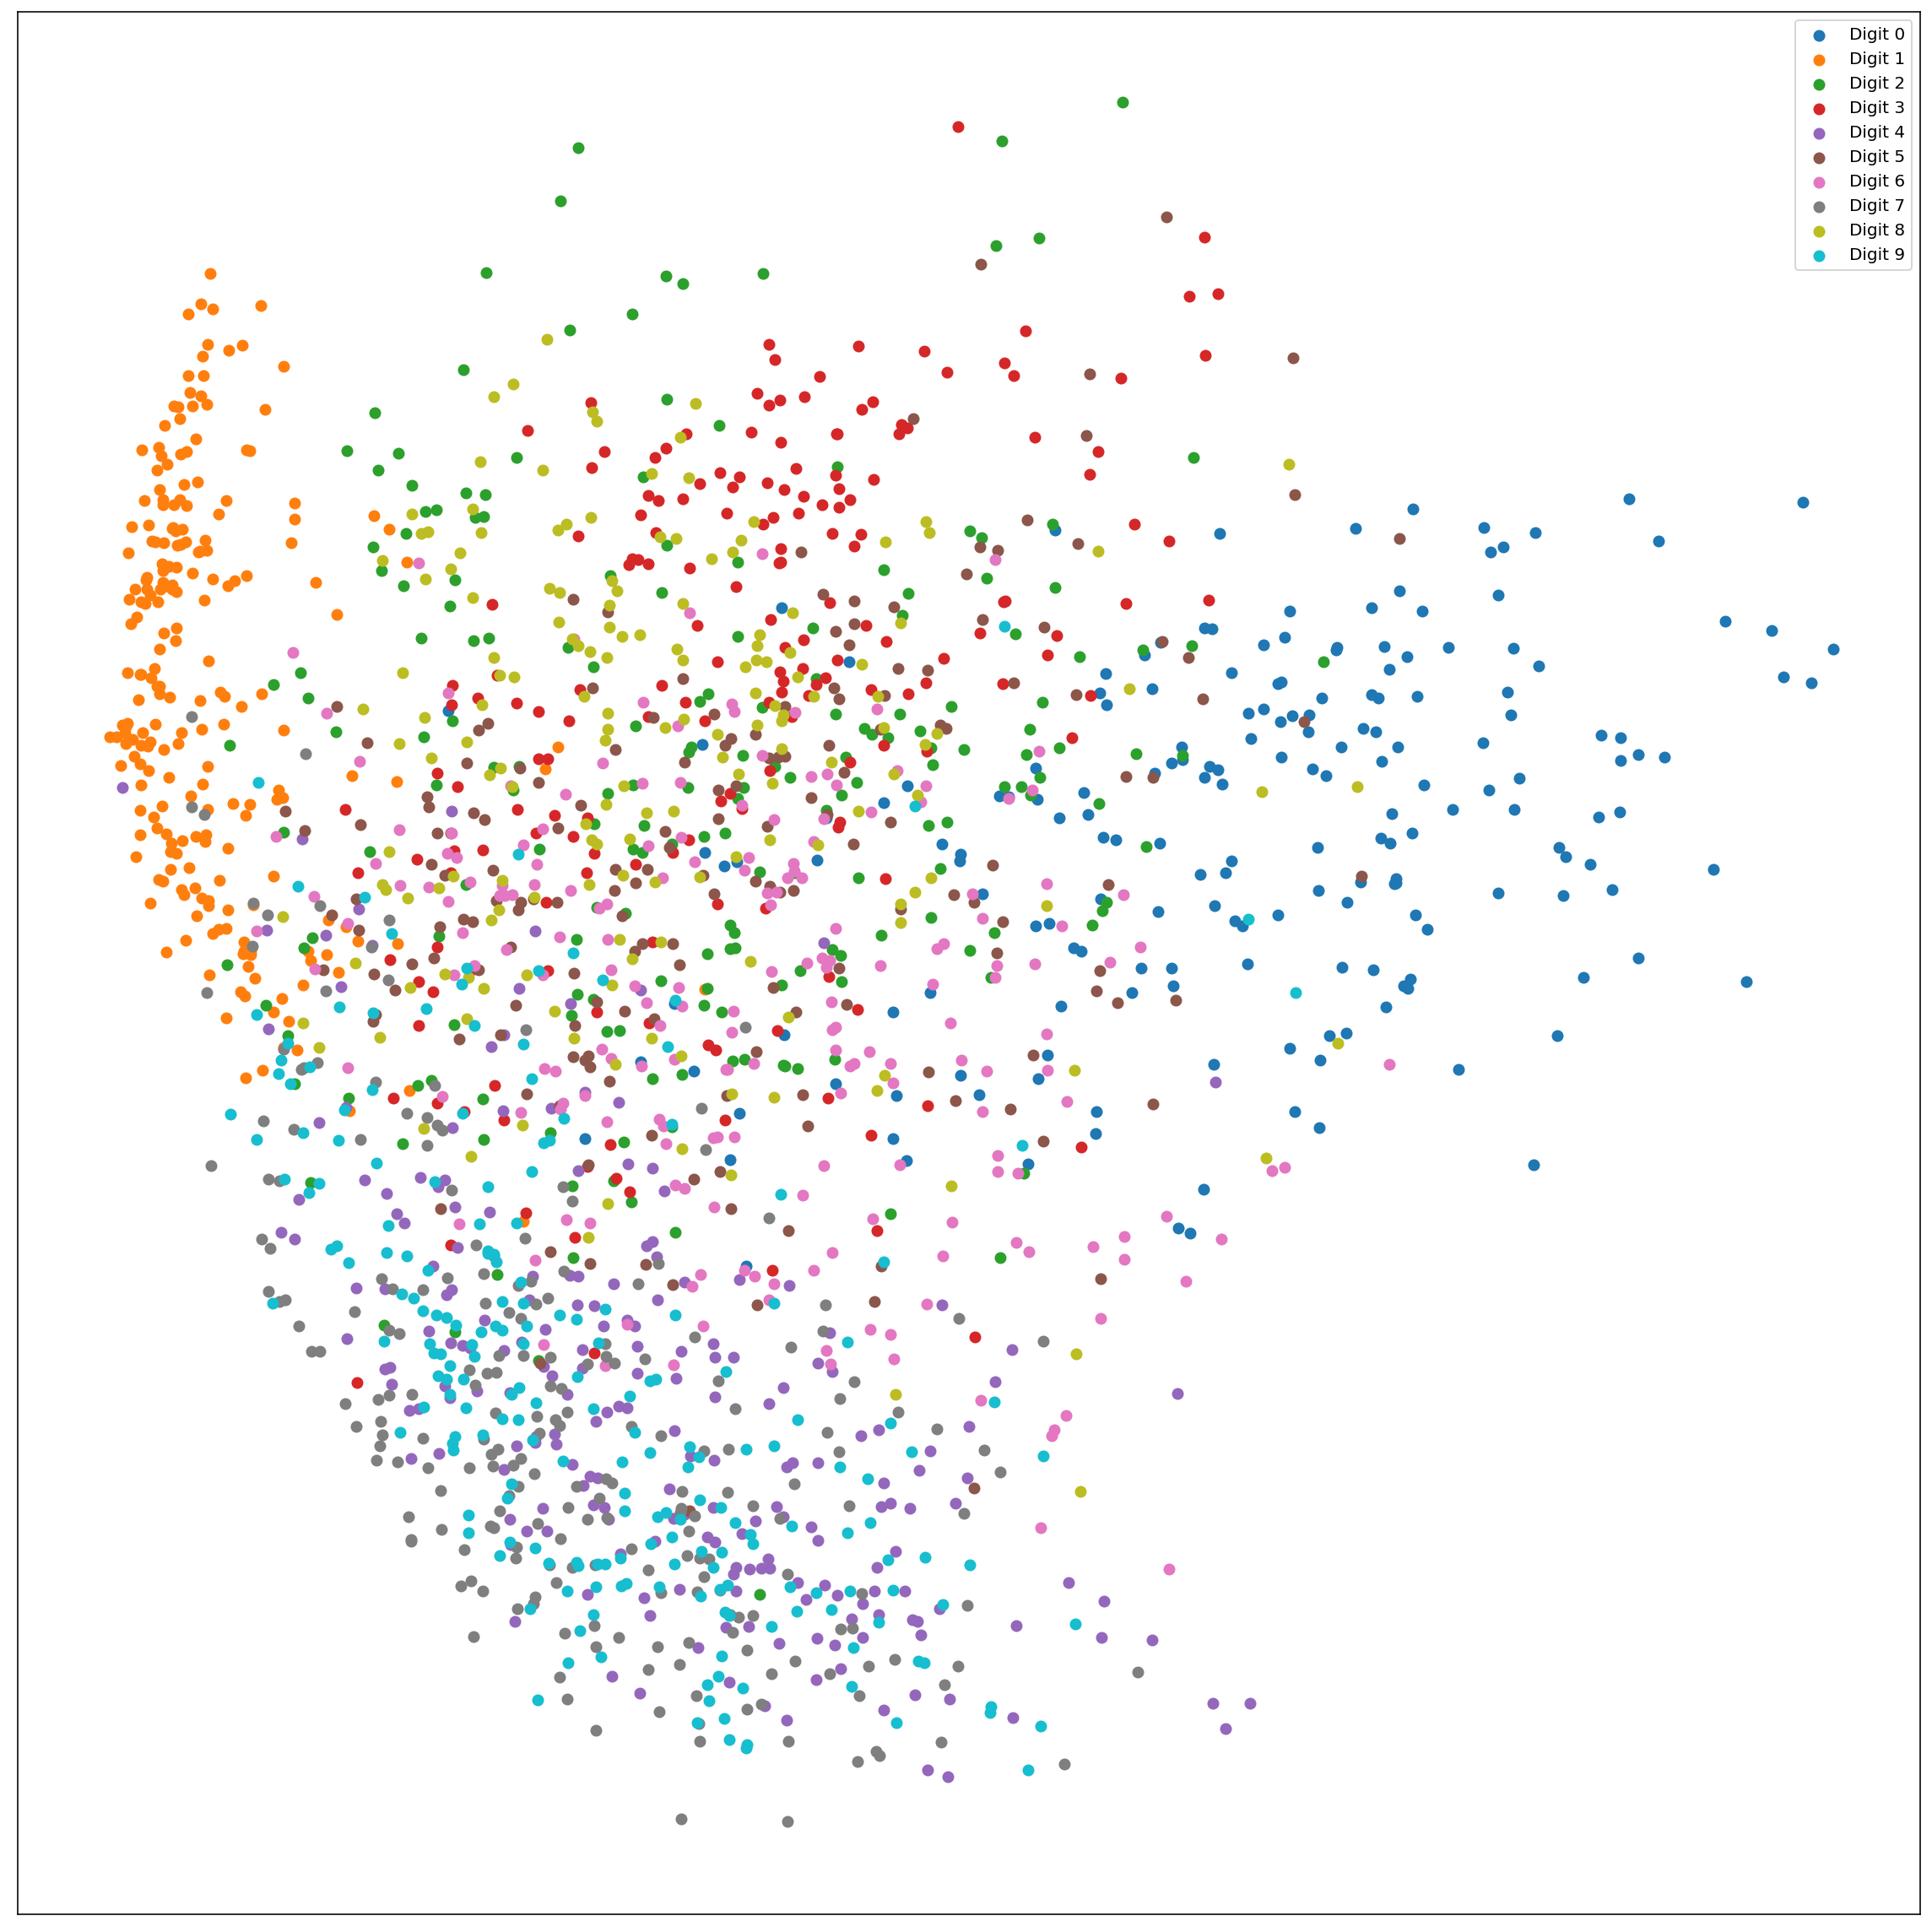

In [16]:
plot_2d_mnist_scatter(X_pca_embedded, y_small)

### T-distributed Stochastic Neighbour Embedding (T-SNE)

Make sure to have a look on this increadible [article on T-SNE](https://distill.pub/2016/misread-tsne/).

Use `T-SNE` function to embed `X_small` in two dimensions. Store the result in `X_tsne_embedded`. <BR>
Use:
 * `n_iter=500` argument to limit the number of T-SNE iterations, 
 * `verbose=2` argument to see a verbose output during embedding.

In [17]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, n_iter=500, verbose=2)
X_tsne_embedded = tsne.fit_transform(X_small)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.415s...
[t-SNE] Computed neighbors for 2000 samples in 8.317s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 2.528206
[t-SNE] Computed conditional probabilities in 0.113s
[t-SNE] Iteration 50: error = 78.0266190, gradient norm = 0.0048462 (50 iterations in 0.947s)
[t-SNE] Iteration 100: error = 75.8543701, gradient norm = 0.0121430 (50 iterations in 0.849s)
[t-SNE] Iteration 150: error = 75.6827698, gradient norm = 0.0083595 (50 iterations in 0.730s)
[t-SNE] Iteration 200: error = 75.6750336, gradient norm = 0.0039207 (50 iterations in 1.042s)
[t-SNE] Iteration 250: error = 75.6567383, gradient norm = 0.0066999 (50 iterations in 1.066s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.656738
[t-SNE] Iteration 300: error = 1.4830620, gradient norm = 0.0010346 (50 iterations in 0.850s)

In [18]:
X_tsne_embedded.shape

(2000, 2)

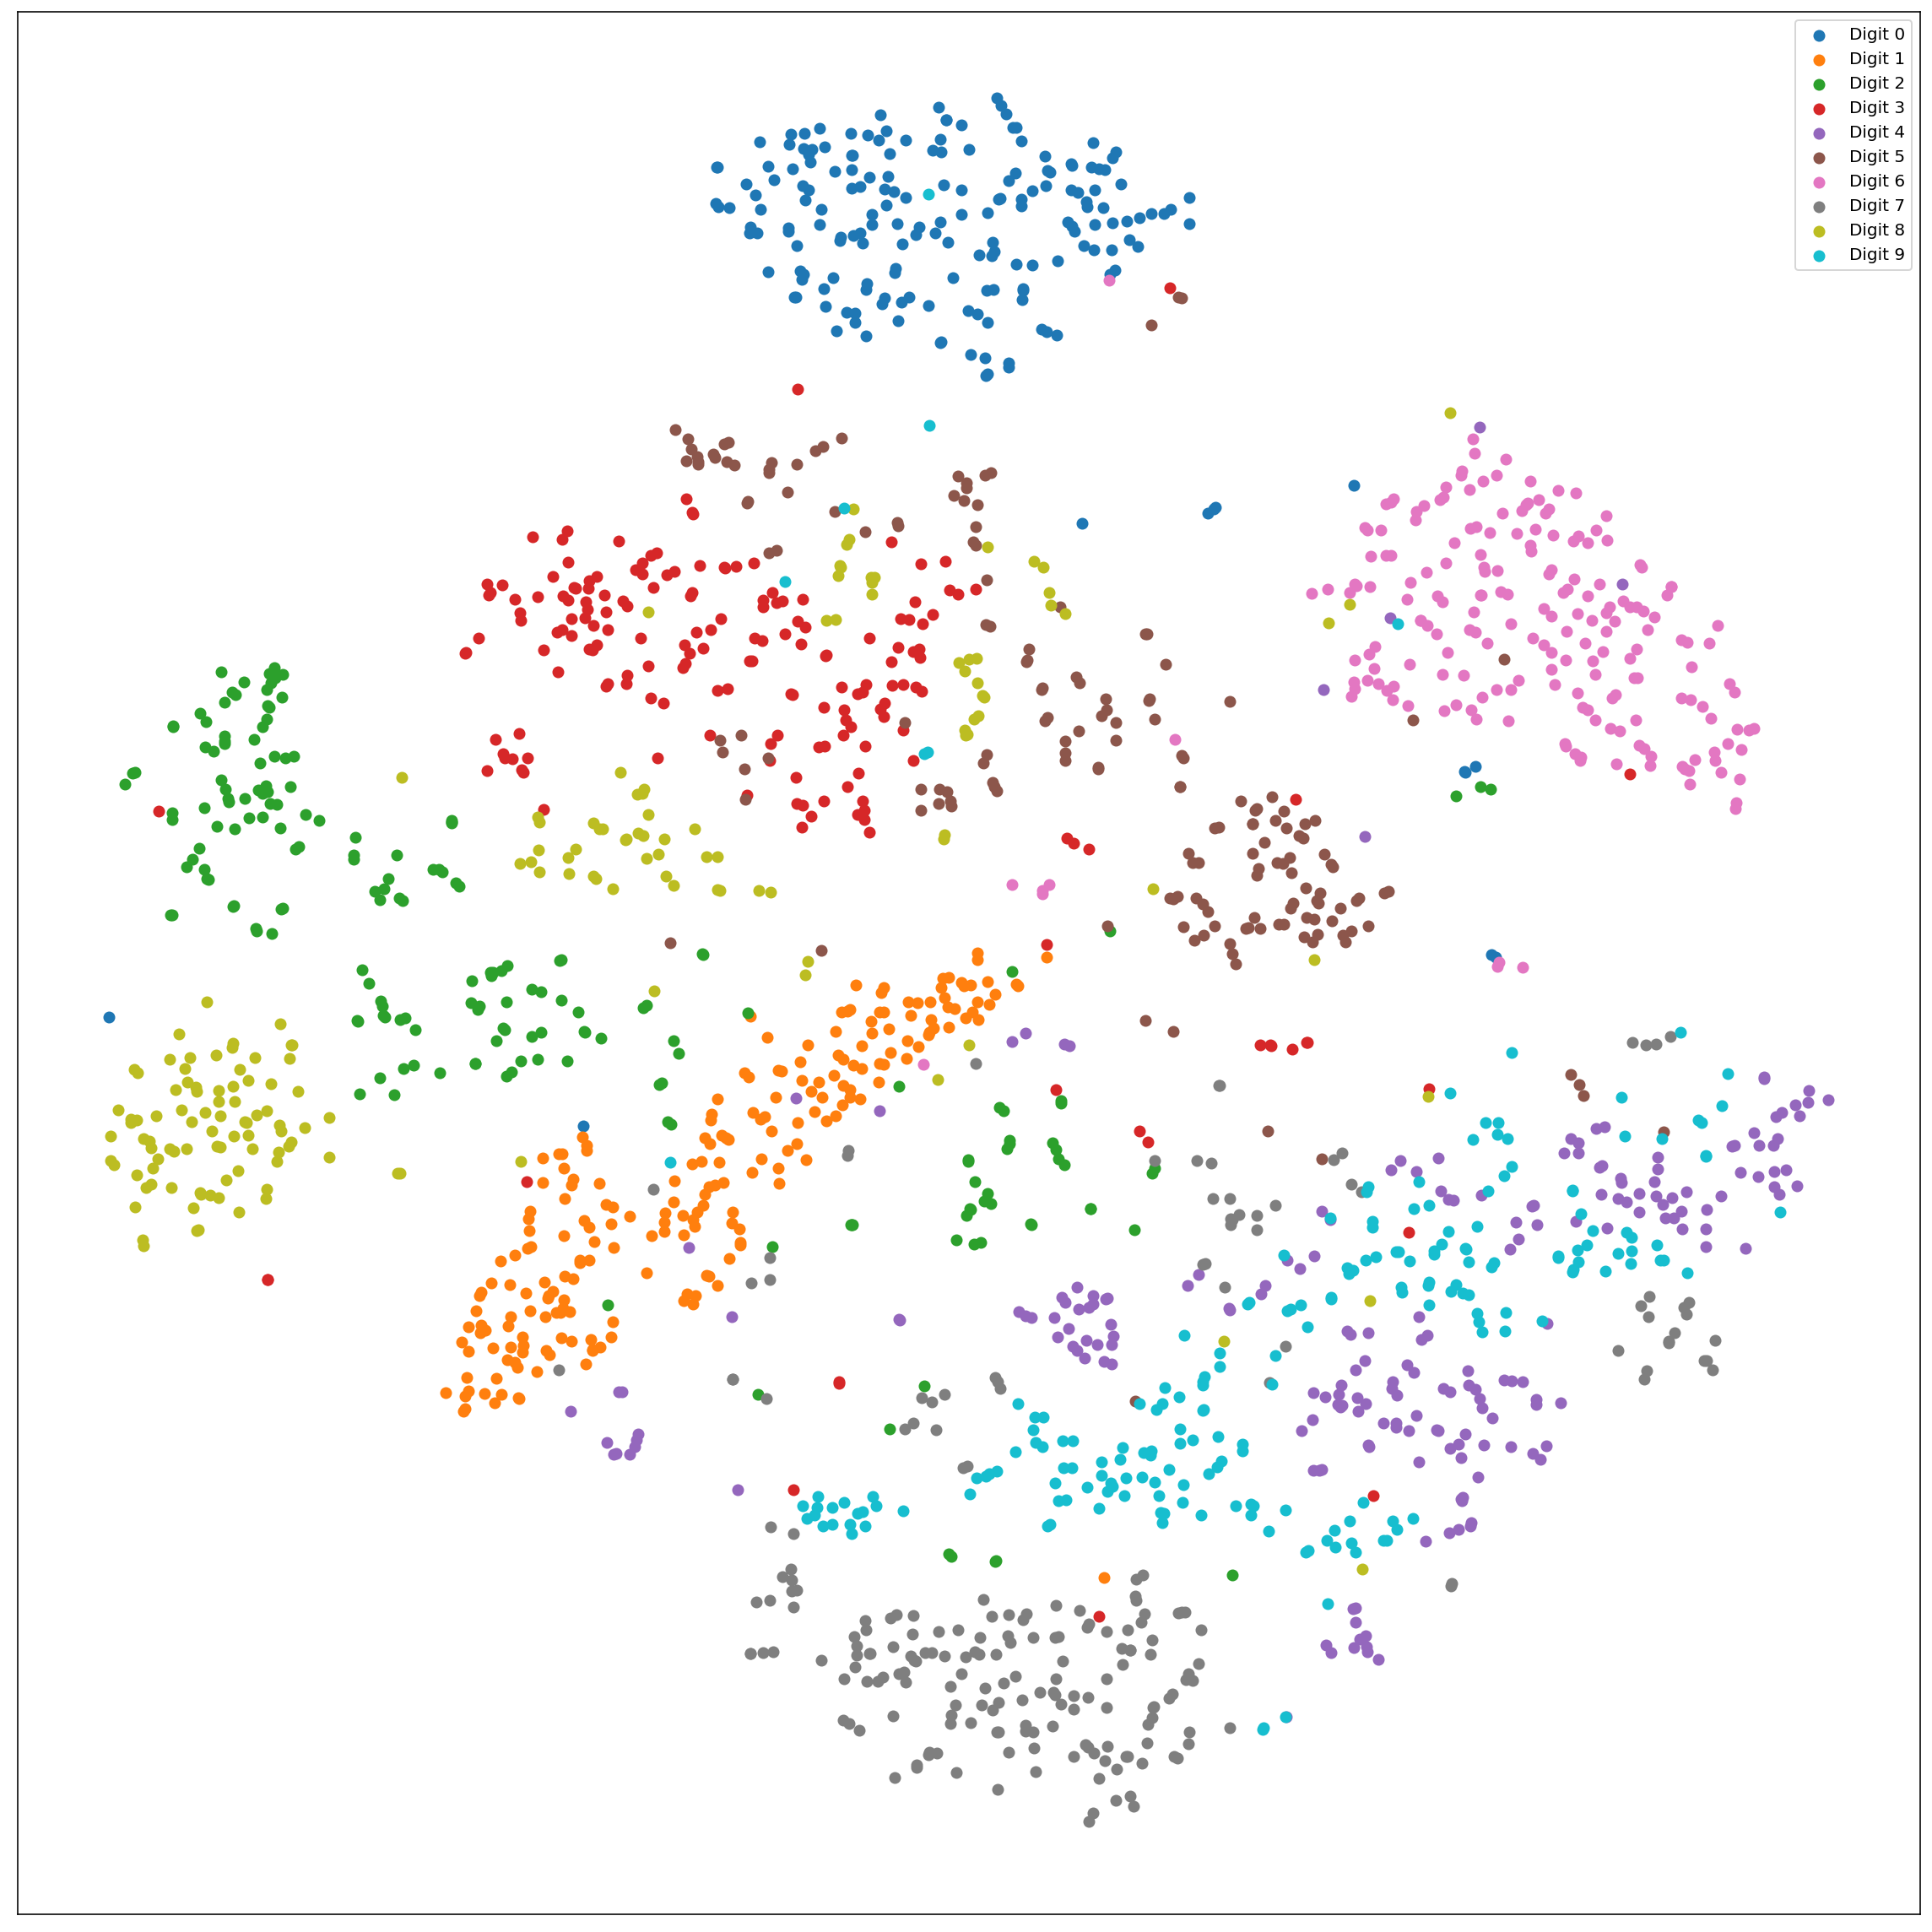

In [19]:
plot_2d_mnist_scatter(X_tsne_embedded, y_small)

### 3D interactive plots with plotly

In [20]:
import chart_studio.plotly as py
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected=True)

def plot_3d_mnist_plotly_scatter(X, y):
    def make_trace(i):
        digit_indeces = y == i
        return go.Scatter3d(
            x=X[digit_indeces, 0],
            y=X[digit_indeces, 1],
            z=X[digit_indeces, 2],
            mode='markers',
            name=str(i),
            marker=dict(
                color=i,
                colorscale='Jet',
                size=4,
                symbol='circle',
                line=dict(
                    color='rgb(204, 204, 204)',
                    width=1
                )
            )
        )
        
    traces = [make_trace(i) for i in range(10)]
    
    layout = go.Layout(margin=dict(l=0, r=0, b=0, t=0))
    fig = go.Figure(data=traces, layout=layout)
    iplot(fig)

Use PCA function to embed `X_small` in **three** dimensions. Store the result in `X_3d_pca_embedded`.

In [21]:
pca_3d = PCA(n_components=3)
X_3d_pca_embedded = pca_3d.fit_transform(X_small, y_small)

In [22]:
X_3d_pca_embedded.shape

(2000, 3)

In [23]:
plot_3d_mnist_plotly_scatter(X_3d_pca_embedded, y_small)

## Classification task

In [24]:
from sklearn.model_selection import train_test_split
SAMPLES_LIMIT=10000
X_train, X_test, y_train, y_test = train_test_split(X[:SAMPLES_LIMIT], y[:SAMPLES_LIMIT], test_size=0.2)

In [25]:
from sklearn import svm

classifier = svm.SVC(C=1, gamma=0.001)
classifier.fit(X_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [26]:
from sklearn import metrics

predicted = classifier.predict(X_test)

print("Classification report for classifier {}:\n{}\n".format(
    classifier, metrics.classification_report(y_test, predicted)))

Classification report for classifier SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       200
           1       0.91      0.98      0.94       218
           2       0.90      0.84      0.87       191
           3       0.89      0.87      0.88       214
           4       0.86      0.94      0.89       186
           5       0.85      0.84      0.85       161
           6       0.93      0.95      0.94       206
           7       0.91      0.89      0.90       216
           8       0.92      0.81      0.87       205
           9       0.88      0.89      0.88       203

    accuracy                           0.90      2000
   macro avg       0.90      0.90      0.90      2000
weighted avg

Calculate and display the confision matrix for `predicted` and `y_test` (use metrics package).

In [34]:
import sklearn.metrics 

confusion_matrix = sklearn.metrics.confusion_matrix(y_test, predicted)

print("Confusion matrix:\n{}".format(confusion_matrix))

Confusion matrix:
[[214   0   0   1   0   0   0   0   0   0]
 [  0 216   1   1   0   1   0   0   1   1]
 [  2   2 169   2   3   1   4   3   3   1]
 [  0   1   5 184   0   4   0   2   1   1]
 [  1   1   0   0 186   0   4   2   1   7]
 [  2   4   0   7   2 147   5   1   3   0]
 [  2   1   3   0   2   3 195   0   0   0]
 [  0   4   3   0   1   0   0 207   1   5]
 [  1   8   3  10   1   6   4   1 152   8]
 [  2   1   0   3   7   1   0   6   0 162]]
